# Loading The Mall Customers Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans,vq

In [4]:
mall_df = pd.read_csv('/content/drive/MyDrive/Datasets/Mall_Customers.csv')
mall_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
mall_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Converting columns data types to float

In [7]:
mall_df['Annual Income (k$)'] = mall_df['Annual Income (k$)'].astype(float)
mall_df['Spending Score (1-100)'] = mall_df['Spending Score (1-100)'].astype(float)

In [8]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Genre                   200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      200 non-null    float64
 4   Spending Score (1-100)  200 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


# Visualizing the data

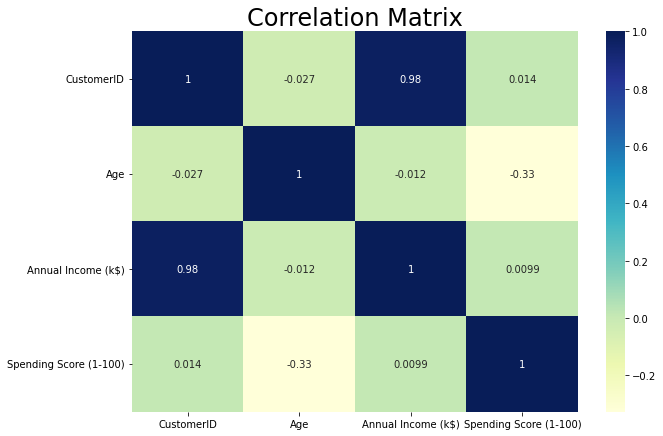

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(mall_df.corr(),cbar = True, annot =True, cmap="YlGnBu");
plt.title('Correlation Matrix', size=24)
plt.show()

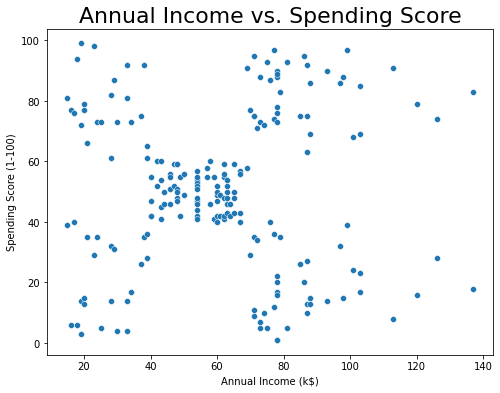

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=mall_df);
plt.title('Annual Income vs. Spending Score', size=22)
plt.show()

- The k-means algorithm adjusts the classification of the observations into clusters and updates the cluster centroids until the position of the centroids is stable over successive iterations.

# Determining The number of clusters using the elbow method

In [16]:
WCSS=[]
num_clusters=range(2,10)

In [22]:
for i in num_clusters:
    centroids, distortions = kmeans(mall_df.iloc[:, -2:], i)
    WCSS.append(distortions)

In [23]:
for i in range(len(WCSS)) : print(f'{i+2} Clusters Distortion:', WCSS[i])

2 Clusters Distortion: 25.292297398329467
3 Clusters Distortion: 19.461209873236022
4 Clusters Distortion: 16.451194112104268
5 Clusters Distortion: 13.014862894193218
6 Clusters Distortion: 11.693869901751683
7 Clusters Distortion: 10.798099150436915
8 Clusters Distortion: 9.971859860001587
9 Clusters Distortion: 9.405697832259893


In [24]:
WCSS = np.array(WCSS)
clusters_num = np.array([item for item in range(2,10)])
clusters_num

array([2, 3, 4, 5, 6, 7, 8, 9])

### ELBOW Method

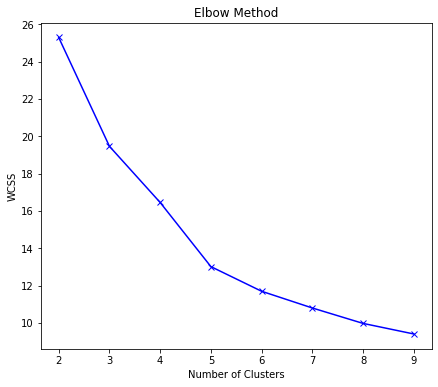

In [25]:
plt.figure(figsize=(7,6))
plt.plot(clusters_num, WCSS,  'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method');

- The best number of clusters is **5**.

# Creating The Clusters

In [26]:
centroids_5, distortions_5 = kmeans(mall_df.iloc[:, -2:], 5)

In [27]:
centroids_5

array([[25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [87.75      , 17.58333333],
       [55.0875    , 49.7125    ]])

In [28]:
#Overall distortions for all centroids 
distortions_5

13.014862894193218

In [29]:
labels, distortions_2 = vq(mall_df.iloc[:, -2:], centroids_5)

In [30]:
print(labels.shape)
print('\n', labels)

(200,)

 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 4 1 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 3 2 4 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 4 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [31]:
print(distortions_2.shape)
print('\n', distortions_2)

(200,)

 [21.32900082 10.85136241 18.12673302 10.01032525 21.23400098  9.35303902
 17.06930164 16.55094814 19.34504132  9.97393297 10.0570208  20.75675734
  8.64343015  6.19583971 10.11736421  5.73880513 15.05252304 14.17511497
  8.73599338 18.83486305 14.27418519  6.59388647 15.96641087  6.40505998
  7.11796364  3.48076177 11.21587452 18.50374097 10.44094021  8.30811612
 17.31210226  7.66498964 18.1901841  14.57978902  9.62402869  7.45454545
  8.63336387 10.43713966 11.84373683 12.08783283 18.3093043  17.61526385
 19.71790661 19.6523615  14.53975711 19.557079   15.98719214 15.32939374
 16.94447735 16.94447735 13.28590654 16.64678084 12.82537767 15.87262778
 12.97363914 14.90017827 11.09122683 11.69253234  9.17825215  9.81658355
 11.05057974 10.51381532  8.40477915 12.31524716  7.20349308 11.68290685
  7.09332873  7.29145476 11.68290685  7.58882814  8.06320733  9.82549299
  5.13715023  8.08797332  2.92238131  4.42326944  3.46270306  2.0286233
  2.53284672  7.78879403  1.68532267  5.398

In [32]:
distortions_2.mean()

13.014862894193218

In [34]:
mall_df['Cluster_Labels'] = labels
mall_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_Labels
0,1,Male,19,15.0,39.0,1
1,2,Male,21,15.0,81.0,0
2,3,Female,20,16.0,6.0,1
3,4,Female,23,16.0,77.0,0
4,5,Female,31,17.0,40.0,1


# Visualizing The Clusters

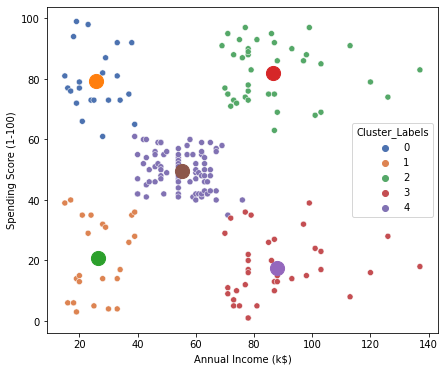

In [35]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=mall_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_Labels', palette='deep')
for i in range(5):
    plt.scatter(x=centroids_5[i,0], y=centroids_5[i,1], s=200);